# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:Max**
+ **Last Name:Marsh**
+ **Email:mmarsh31@illinois.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: I believe it is Gemini. It is the one native to Colab that automatically suggests while you are typing**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**
The prior probability that the patient has TB without running a test is simply th percentage of the population with TB or $p(B|I)=0.004$
<br><br><br><br><br><br><br><br><br>


B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
The probability that the person tests positive given that they have TB is simply the test sensitivity which is given or $p(A|B,I)=0.8$.
<br><br><br><br><br><br><br><br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
Using the "obvious" rule, $$p(\neg A|\neg B, I)+p(A|\neg B, I)=1$$<br> We are already given that $$p(\neg A|\neg B, I)=0.9$$<br> and so the  probability that the test is positive given that the patient does not have tuberculosis is $$p(A|\neg B, I)=0.1$$
<br><br><br><br><br><br><br><br><br>


D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**
Using Bayes rule, $$p(B|A,I)=\frac{p(A,B|I)}{p(A|I)}=\frac{p(A|B,I)p(B|I)}{p(A|I)}$$ <br> Using the sum rule $$p(A|I)=p(A|B,I)p(B|I)+p(A|\neg B,I)p(\neg B|I)$$<br> We can use the previous results plus the sum rule to determine that $$p(\neg B|I)=0.996$$<br> This results in $$p(A|I)=0.1028$ and $p(\neg A|I)=0.8972$$<br> Substituting all of these into the original equation we find that $$p(B|A,I)=\frac{(0.8)(0.004)}{(0.8)(0.004)+(0.1)(0.996)}=0.031=3.1\%$$
<br><br><br><br><br><br><br><br>

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**
By Bayes rule, $$p(B|\neg A, I)=\frac{p(B,\neg A|I)}{p(\neg A|I)}=\frac{p(\neg A,B|I)}{p(\neg A|I)}=\frac{p(\neg A|B,I)p(B|I)}{p(\neg A|I)}=\frac{(0.2)(0.004)}{0.8972}=0.00089=0.089\%$$. The prior information tells us that 0.4% of the population has TB. After receiving a positive test, the probability that one has TB increases from 0.4% to 3.1%. After receiving a negative test, the probability that one has TB decreases from 0.4% to 0.089%. Both results update our initial prior information. However, the probability of a positive test result is still very low which is likely due to the low percentage of the population having TB in the first place.
<br><br><br><br><br><br><br><br>

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**
We start with $$p(B|A, I)=\frac{p(B,A|I)}{p(A|I)}=0.99 \Rightarrow p(B,A|I)=0.99p(A|I)$$ <br> We can rewrite the LHS using Bayes rule to get <br> $$p(A|B,I)p(B|I)=0.99p(A|I)$$ <br> Rearranging and substituting in for $p(A|I)$ using the sum rule, <br>$$p(A|B,I)=0.99\frac{p(A|B,I)(0.004)+p(A|\neg B,I)(0.996)}{0.004}$$ which can be rearranged to
<br>
$$p(A|B,I)=24,651p(A|\neg B,I)$$ <br> where the LHS is the sensitivity and the RHS is the false positivity rate. Online, I found that a good false positive rate is $~5\% $ which in that case means the sensitvity must be $1,232$ i.e. greater than $100\%$. In fact, for the sensitivity to be less than $100\%$, the false positive rate must be less than $0.004\%$ which is impossibly low. Therefore these TB testing conditions are essentially impossible. When creating a good test, one must be mindful of the false positive rate, the sensitivity, and the ratio between them. They are intimately connected given a base state which must be considered in design. 
<br><br><br><br><br><br><br><br><br>

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**
<br><br>

In [3]:
# You can also answer with code here:
from scipy.stats import rv_discrete

values = np.array([0, 1, 2, 3])
probs = np.array([0.3, 0.1, 0.2, 0.4])

X = rv_discrete(values=(values, probs))
expected_value = X.expect()
print(f"The expected value is {expected_value}")

The expected value is 1.7000000000000002


B. The variance $\mathbb{V}[X]$.

**Answer:**
<br><br>

In [4]:
# You can also answer with code here:
variance = X.var()
print(f"The variance is {variance}")

The variance is 1.6099999999999994


C. Plot the probability mass function of $X$.

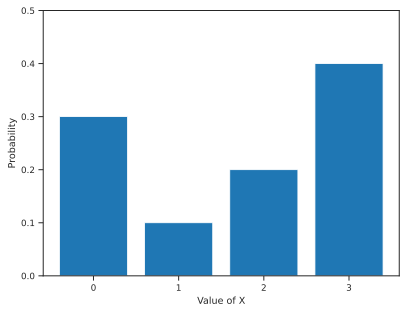

In [5]:
# Your code here. Hint: use a bar plot
plt.bar(values, probs)
plt.xlabel("Value of X")
plt.ylabel("Probability")
plt.xticks(values)
plt.yticks(np.linspace(0, 0.5, 6))
plt.show()


D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [6]:
# You can also answer with code here:
prob_0_2 = X.pmf(0) + X.pmf(2)
print(f"The probability that X is in {{0, 2}} is {prob_0_2}")

The probability that X is in {0, 2} is 0.5


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br><br>

In [7]:
# You can also answer with code here:
expected_value = X.expect()*4 + 3
print(f"The expected value is {expected_value} due to the linearity of the expected value")

The expected value is 9.8 due to the linearity of the expected value


F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br><br>

In [8]:
# You can also answer with code here:
variance = X.var()*4**2 + X.var(3)
print(f"The variance is {variance} ")

The variance is 27.36999999999999 


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

<ipython-input-9-8c80012f265e>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", frameon=False)


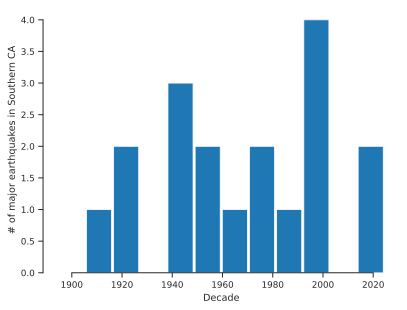

In [9]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [10]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [11]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

<BarContainer object of 10 artists>

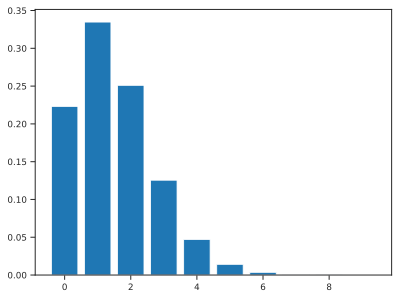

In [13]:
# Your code here
values = np.arange(0, 10)
probs = X.pmf(values)
plt.bar(values, probs)

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [15]:
# You can also answer with code here:
X_1 = 1 - X.pmf(0)
print(f"The probability that at least one major earthquake will occur during the next decade is {X_1}")

The probability that at least one major earthquake will occur during the next decade is 0.7768698398515702


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [16]:
# You can also answer with code here:
X_2 = st.poisson(r*2)
X_2_1 = 1 - X_2.pmf(0)
print(f"The probability that at least one major earthquake will occur during the next two decades is {X_2_1}")

The probability that at least one major earthquake will occur during the next two decades is 0.950212931632136


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [17]:
# You can also answer with code here:
X_5 = st.poisson(r*5)
X_5_1 = 1 - X_5.pmf(0)
print(f"The probability that at least one major earthquake will occur during the next five decades is {X_5_1}")

The probability that at least one major earthquake will occur during the next five decades is 0.9994469156298522


## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [19]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [20]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

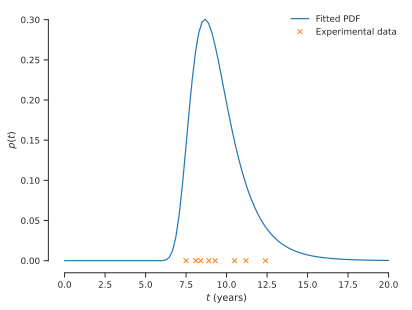

In [21]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [24]:
# Your code here
t_mean = T.mean()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")



E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

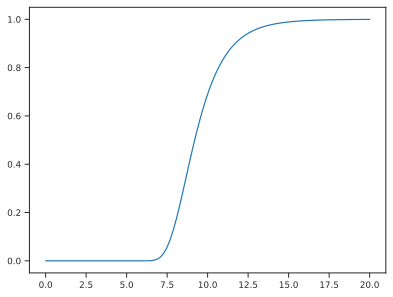

In [25]:
# Your code here
ts = np.linspace(0.0, 20.0, 100)
fig, ax = plt.subplots()
ax.plot(
    ts,
    T.cdf(ts),
    label="Fitted CDF"
)

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

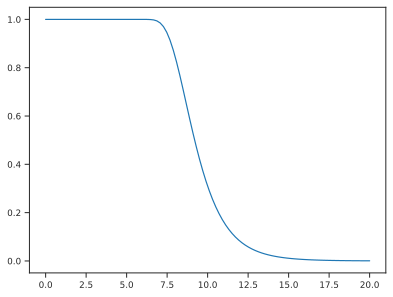

In [26]:
# Your code here
S_t = 1 - T.cdf(ts)
fig, ax = plt.subplots()
ax.plot(
    ts,
    S_t,
    label="Fitted CDF"
)

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [27]:
# Your code here
prob = T.cdf(10) - T.cdf(8)
print(f"The probability that the gear lasts anywhere between 8 and 10 years is {prob}")

The probability that the gear lasts anywhere between 8 and 10 years is 0.5342898192604528


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [28]:

t_star = T.ppf(0.01)
print(f"The time t* such that the probability that the gear fails before t* is 0.01 is {t_star}")

The time t* such that the probability that the gear fails before t* is 0.01 is 6.975009984185545
